# UNAD

## Hector Julio Hernandez Marin

## Agrupamiento en hierarchical clustering.

## Pasos de la Actividad

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Entrenar el modelo configurando los diferentes hiperparámetros
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenido.s
8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/


# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [49]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo hierarchical clustering
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')


In [53]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('Mall_Customers.csv')

In [55]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [59]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

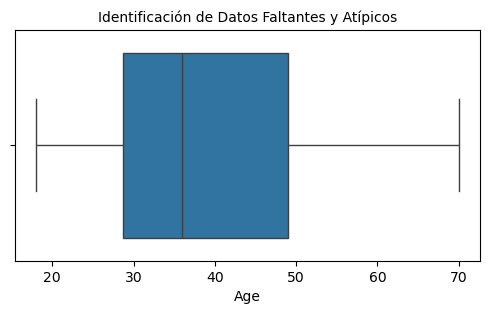

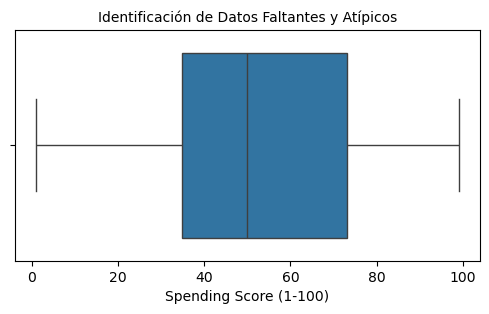

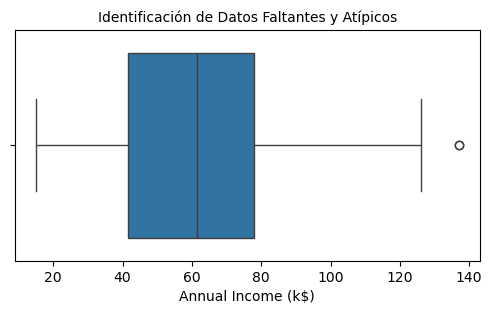

In [61]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [63]:
print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntuación de gasto (1-100): ",Datos['Spending Score (1-100)'].isin([0]).sum())
print("Cantidad de Registros con cero en Data Ingreso Anual (k$): ",Datos['Annual Income (k$)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Puntuación de gasto (1-100):  0
Cantidad de Registros con cero en Data Ingreso Anual (k$):  0


In [65]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Age']=Datos['Age'].replace(0,Datos['Age'].mean())
Datos['Spending Score (1-100)']=Datos['Spending Score (1-100)'].replace(0,Datos['Spending Score (1-100)'].mean())
Datos['Annual Income (k$)']=Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

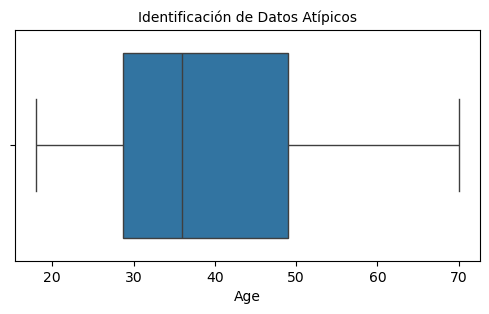

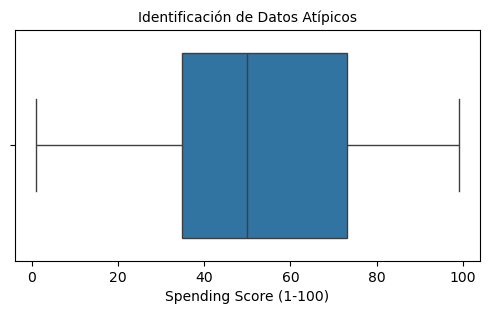

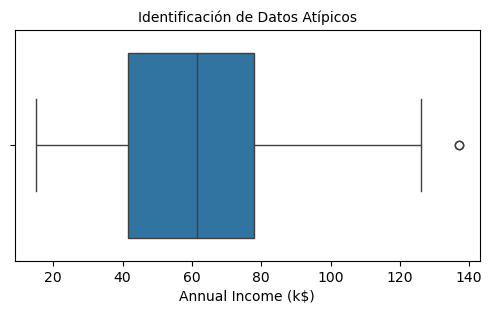

In [67]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [69]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Spending Score (1-100)']<nivel_minimo)|(Datos['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Annual Income (k$)']<nivel_minimo)|(Datos['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0
El total de datos atípicos es 0
El total de datos atípicos es 14


In [71]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Annual Income (k$)']<nivel_maximo)&(Datos['Annual Income (k$)']>nivel_minimo)]

In [73]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Características de interes para el agrupamiento:

. Data Ingreso Anual (k$)

. Puntuación de gasto (1-100)

. Edad

In [75]:

# Filtrar columnas del modelo 

Datos = Datos[["Age","Spending Score (1-100)","Annual Income (k$)"]]

In [77]:
Datos_uno = Datos.copy()
Datos_dos = Datos.copy()

In [79]:
# Revisión de los datos de las variables objetivo

Datos_uno.head(10)

,Age,Spending Score (1-100),Annual Income (k$)
0,19,39,15
1,21,81,15
2,20,6,16
3,23,77,16
4,31,40,17
5,22,76,17
6,35,6,18
7,23,94,18
8,64,3,19
9,30,72,19


In [81]:
# Revisión de los datos de las variables objetivo

Datos_dos.head(10)

,Age,Spending Score (1-100),Annual Income (k$)
0,19,39,15
1,21,81,15
2,20,6,16
3,23,77,16
4,31,40,17
5,22,76,17
6,35,6,18
7,23,94,18
8,64,3,19
9,30,72,19


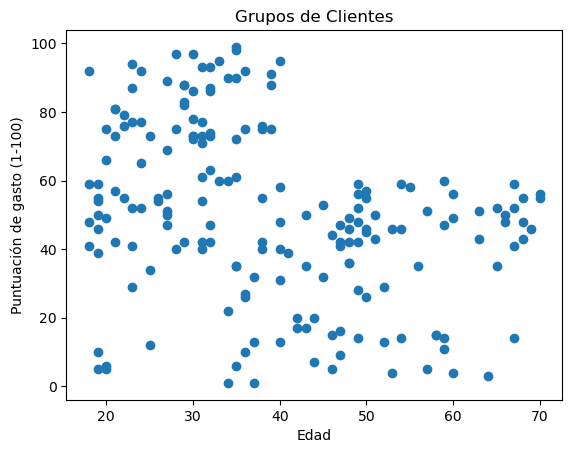

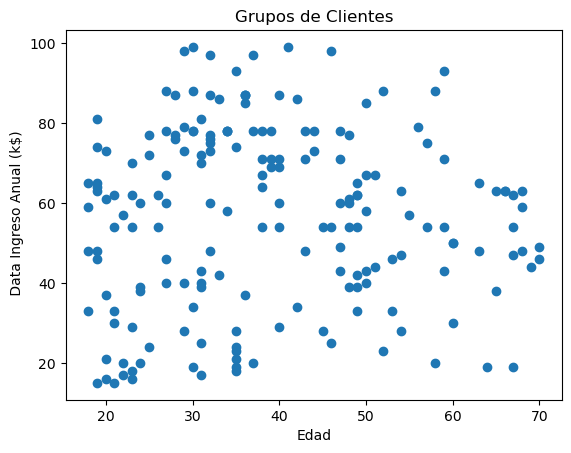

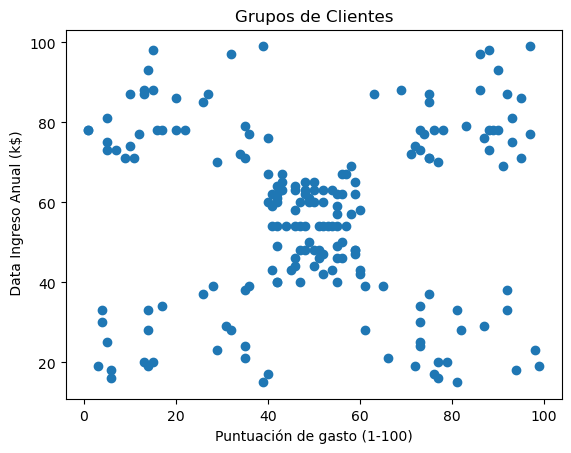

In [83]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Age'], Datos['Spending Score (1-100)'])
plt.xlabel('Edad')
plt.ylabel('Puntuación de gasto (1-100)')
plt.title('Grupos de Clientes')
plt.show()

plt.scatter(Datos['Age'], Datos['Annual Income (k$)'])
plt.xlabel('Edad')
plt.ylabel(' Data Ingreso Anual (k$)')
plt.title('Grupos de Clientes')
plt.show()

plt.scatter(Datos['Spending Score (1-100)'], Datos['Annual Income (k$)'])
plt.xlabel('Puntuación de gasto (1-100)')
plt.ylabel(' Data Ingreso Anual (k$)')
plt.title('Grupos de Clientes')
plt.show()

# 4. Entrenar el modelo configurando los diferentes hiperparámetros opcion 1

## Preparación de los Datos Para aplicar el modelo de clustering jerárquico, es recomendable estandarizar los datos si contienen diferentes escalas. Esto se hace con el StandardScaler de scikit-learn, que centra los datos alrededor de 0 y les da una desviación estándar de 1:

In [89]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos_uno[["Age","Spending Score (1-100)","Annual Income (k$)"]])

## Visualización del Dendrograma Antes de aplicar el modelo, es común visualizar el dendrograma para tener una idea de cómo se agruparán los datos. Esto se puede hacer con la función linkage de SciPy y dendrogram para mostrar el árbol de agrupamiento.

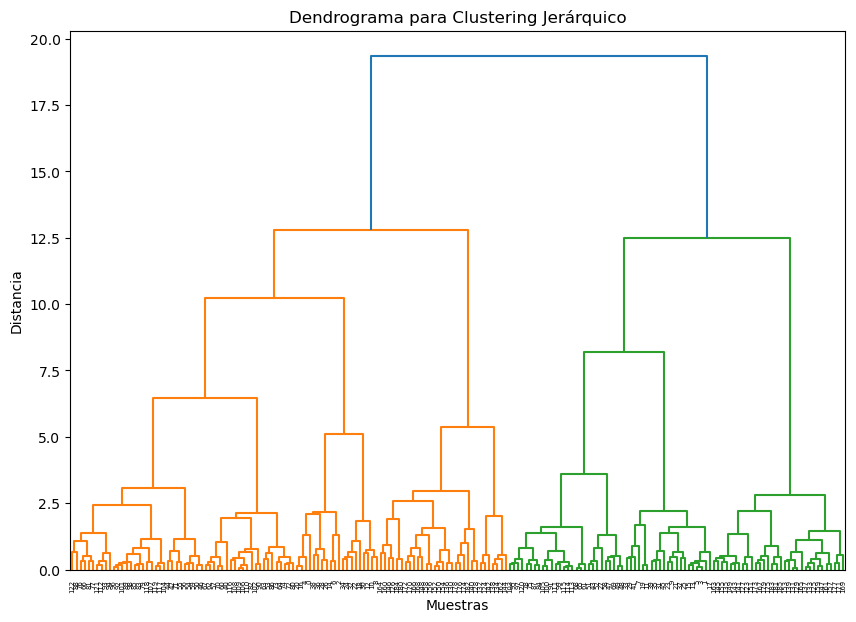

In [91]:
# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

# 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. opcion 1

In [95]:
# Suponiendo que 'Datos_uno' es tu DataFrame
# Reemplazar los valores NaN con la media de cada columna
Datos_uno[["Age", "Spending Score (1-100)", "Annual Income (k$)"]] = Datos_uno[["Age", "Spending Score (1-100)", "Annual Income (k$)"]].fillna(
    Datos_uno[["Age", "Spending Score (1-100)", "Annual Income (k$)"]].mean()
)

# Preprocesamiento de los datos
scaler = StandardScaler()  # Inicializar el escalador estándar
scaled_data = scaler.fit_transform(Datos_uno[["Age", "Spending Score (1-100)", "Annual Income (k$)"]])  
# Ajustar el escalador a los datos y transformar las columnas seleccionadas

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Configurar el modelo con 3 clusters y enlace 'ward'
labels = model.fit_predict(scaled_data)  # Ajustar el modelo y predecir las etiquetas de los clusters

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)  # Calcular el coeficiente de Silhouette
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)  # Calcular el índice de Calinski-Harabasz
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)  # Calcular el índice de Davies-Bouldin
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.33213815748086906
Índice de Calinski-Harabasz: 84.90139875046562
Índice de Davies-Bouldin: 1.1305024940373654


# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo opcion 1

### Gráfico de Dispersión para Visualización de Clusters

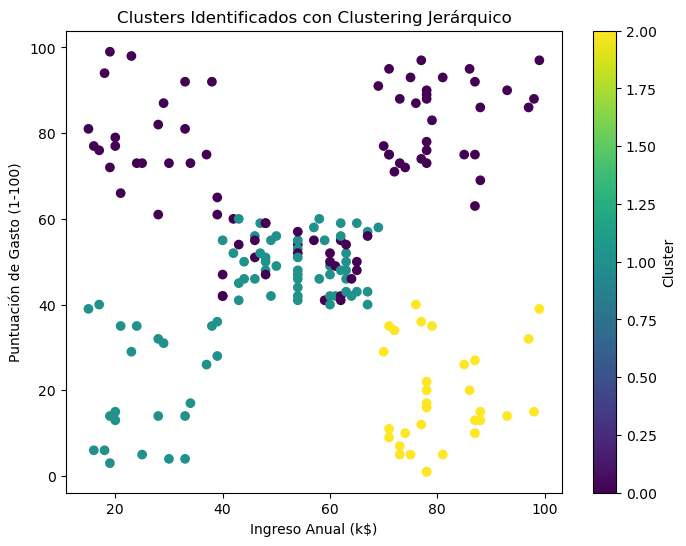

In [98]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=3)  # Ajustar el número de clusters a 3
Datos_uno['Cluster'] = model.fit_predict(scaled_data)  # Asignar las etiquetas de cluster al DataFrame

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    Datos_uno["Annual Income (k$)"],  # Eje X: Ingreso anual
    Datos_uno["Spending Score (1-100)"],  # Eje Y: Puntuación de gasto
    c=Datos_uno["Cluster"],  # Color según el cluster asignado
    cmap='viridis'
)
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.colorbar(label='Cluster')
plt.show()

## Gráfico de Silueta

Silhouette Score: 0.33213815748086906


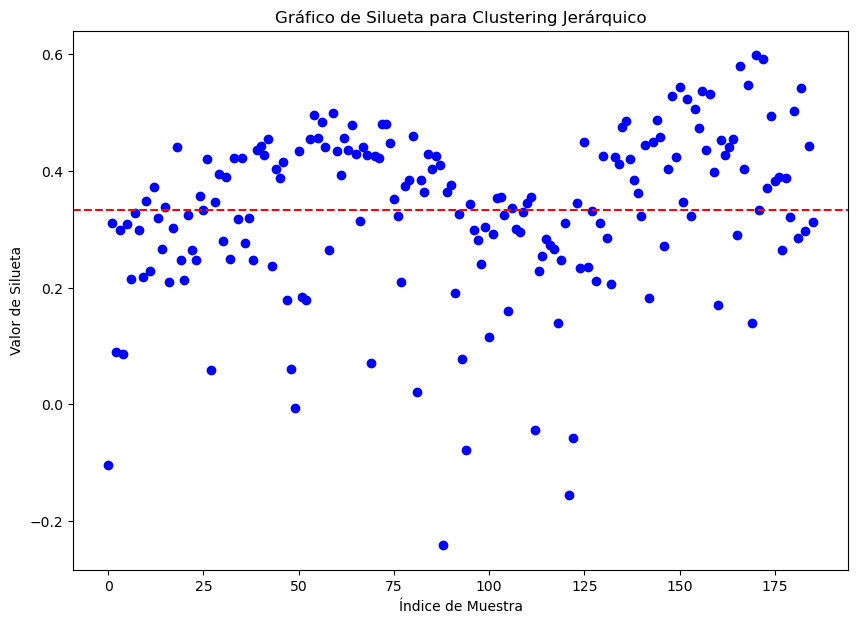

In [103]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular el puntaje promedio de silueta
silhouette_avg = silhouette_score(scaled_data, model.fit_predict(scaled_data))  # Ajustar y predecir con el modelo directamente
print(f'Silhouette Score: {silhouette_avg}')

# Calcular los valores individuales de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.fit_predict(scaled_data))

# Crear el gráfico de silueta
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(sample_silhouette_values, 'bo')  # Representar los valores individuales de silueta
ax.axhline(y=silhouette_avg, color="red", linestyle="--")  # Línea roja para el promedio de silueta
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Índice de Muestra")
ax.set_ylabel("Valor de Silueta")
plt.show()

# 7. Interpretar, analizar y documentar los resultados obtenidos

1. Coeficiente de Silhouette: 0.3321
El Coeficiente de Silhouette obtenido de 0.3321 sugiere que los clusters identificados no son completamente disjuntos, pero tampoco están tan mal segmentados. Este valor se encuentra en el rango positivo, lo que indica que la mayoría de los puntos dentro de cada cluster están bien asignados, pero no lo suficientemente alejados de otros clusters. Un valor como este indica que hay cierta superposición entre los clusters, lo que podría sugerir que el número de clusters elegido no es el más óptimo.

Conclusión sobre el Silhouette Score:

Positivo pero moderado: Aunque los puntos dentro de cada cluster están relativamente bien agrupados, hay un nivel de solapamiento entre los clusters. Esto podría indicar que la segmentación no es completamente precisa y que algunos puntos podrían pertenecer a diferentes clusters.
Recomendación: Para mejorar la calidad de la segmentación, podría ser útil experimentar con diferentes números de clusters o probar otras técnicas de clustering, como K-means o DBSCAN, para evaluar si los resultados pueden mejorar.

2. Índice de Calinski-Harabasz: 84.9014
El Índice de Calinski-Harabasz de 84.9014 es relativamente bajo. Este índice mide la separación y cohesión de los clusters. Un valor alto de Calinski-Harabasz generalmente indica que los clusters son compactos y bien separados, mientras que un valor bajo sugiere que los clusters no están bien definidos o que podrían haber sido mal segmentados.

Conclusión sobre el Índice de Calinski-Harabasz:

Bajo valor: El índice obtenido sugiere que los clusters no están tan bien separados ni tan bien definidos. Es posible que los clusters estén demasiado dispersos, lo que podría indicar una segmentación poco óptima.
Recomendación: El valor bajo del índice sugiere que se podría probar un número diferente de clusters, ya que una segmentación más precisa podría mejorar este índice. Además, se podría considerar utilizar otro algoritmo de clustering que maneje mejor la dispersión de los datos.

3. Índice de Davies-Bouldin: 1.1305
El Índice de Davies-Bouldin obtenido es 1.1305, lo que indica una moderada separación entre los clusters. Este índice mide la relación entre la dispersión interna de los clusters y la distancia entre los clusters. Un valor bajo indica que los clusters están bien separados, mientras que un valor alto indica que hay mucho solapamiento entre ellos.

Conclusión sobre el Índice de Davies-Bouldin:

Valor moderado: Un valor de 1.1305 es relativamente bajo, lo que sugiere que los clusters no están completamente separados, pero tampoco hay una gran superposición entre ellos. Esto indica que los clusters están algo dispersos pero no de forma excesiva.
Recomendación: Aunque este valor no es alarmante, sugiere que la segmentación podría mejorarse. De nuevo, probar con un número diferente de clusters o experimentar con otros métodos de clustering podría dar como resultado una segmentación más clara y precisa.

    Resumen Final:
Los resultados obtenidos con el modelo de Clustering Jerárquico sugieren que la segmentación de los clientes no está perfectamente definida. El Silhouette Score moderadamente bajo, el Índice de Calinski-Harabasz relativamente bajo y el Índice de Davies-Bouldin moderado indican que hay espacio para mejorar la separación y cohesión entre los clusters. Esto puede ser consecuencia de una segmentación subóptima, que podría mejorar ajustando el número de clusters, utilizando un modelo diferente o ajustando los parámetros del modelo actual. En general, los resultados indican que la segmentación es aceptable, pero no óptima, y que se puede mejorar con ajustes en el modelo o en la selección de características.